# 数据集1：Consumer & Visitor Insights For Neighborhoods

## 1. 数据可视化和摘要 

首先读取数据集，并查看数据集情况

In [1]:
import re
import ast
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab

In [2]:
def prefunction(x) :
    x = json.loads(x)
    if not x :
        return np.nan
    else :
        return x

converts = {
    "visitor_home_cbgs":prefunction,
    "visitor_work_cbgs":prefunction,
    "related_same_day_brand":prefunction,
    "related_same_month_brand":prefunction,
    "top_brands":prefunction,
    "popularity_by_hour":prefunction,
    "popularity_by_day":prefunction
}
    
data = pd.read_csv("cbg_patterns.csv",converters = converts)

print(data.dtypes)
data.head()
data.tail()

census_block_group          float64
date_range_start              int64
date_range_end                int64
raw_visit_count             float64
raw_visitor_count           float64
visitor_home_cbgs            object
visitor_work_cbgs            object
distance_from_home          float64
related_same_day_brand       object
related_same_month_brand     object
top_brands                   object
popularity_by_hour           object
popularity_by_day            object
dtype: object


,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
220730,4.805799e+11,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220731,3.611901e+11,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220732,2.603398e+11,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220733,1.500799e+11,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
220734,NaN,1538352000,1541030400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


可以看出，visitor_home_cbgs、visitor_work_cbgs、related_same_day_brand、related_same_month_brand、top_brands是标称属性。然而这些标称属性有一个共同的特征，就是他们的每一项都是一个字典。比如visitor_home_cbgs和visitor_work_cbgs这两个属性，其中每一项都是来自其它各个CBG的人数，所以在统计频数的时候，应该单独统计来自各个CBG的人数，这样才有意义。对于其它三个关于品牌的属性，每一项中都是一个列表，分别是几个品牌的名字，也应该独立统计各个品牌。

### 1.1 数据摘要
#### 标称属性
用于统计visitor_home_cbgs和visitor_work_cbgs两个属性的函数

In [3]:
def count_cbgs(data_source):
    result = {}
    for raw in data_source :
        if not pd.isnull(raw) :
            for key in raw:
                if key in result :
                    result[key] += raw[key]
                else :
                    result[key] = raw[key]
    return result

In [4]:
print("visitor_home_cbgs" + " 属性统计结果")
count_cbgs(data['visitor_home_cbgs'])

visitor_home_cbgs 属性统计结果


{'010059501003': 1389,
 '010059509001': 1562,
 '010059509002': 778,
 '010059505001': 1882,
 '010059506002': 1042,
 '010059508002': 654,
 '010059505003': 517,
 '010059501002': 350,
 '010059507002': 211,
 '010690402011': 15315,
 '010690402021': 14009,
 '132399603002': 159,
 '130619603001': 288,
 '010670303001': 457,
 '010730113021': 40771,
 '010090506022': 22273,
 '010090506024': 13168,
 '010730115001': 16927,
 '010730117041': 23695,
 '010830212001': 40799,
 '010730114004': 10249,
 '010830212002': 30317,
 '010730114003': 6828,
 '010890109012': 36842,
 '010730113023': 16013,
 '011250112001': 78562,
 '010890106231': 37487,
 '011030053042': 17890,
 '010890110111': 20159,
 '010090506025': 8024,
 '010439649001': 9519,
 '010439655001': 7330,
 '010730117031': 28924,
 '010730116002': 16589,
 '010439657002': 6179,
 '010439647003': 6639,
 '010730045001': 34019,
 '010730114002': 7214,
 '010730113022': 9852,
 '010890109013': 46137,
 '010090506012': 2102,
 '010439655003': 3558,
 '010439655002': 3683,

In [5]:
print("visitor_work_cbgs" + " 属性统计结果")
count_cbgs(data['visitor_work_cbgs'])

visitor_work_cbgs 属性统计结果


{'010059501003': 2499,
 '010810407002': 145400,
 '010810420061': 22976,
 '010690402024': 16644,
 '010890111001': 142788,
 '010730045001': 183320,
 '010439649003': 19425,
 '010730027001': 130088,
 '011250112001': 195250,
 '010890014022': 70591,
 '010730117032': 32532,
 '010090506023': 6421,
 '010730115001': 8507,
 '010770101002': 33464,
 '010730113021': 14380,
 '010890031003': 34165,
 '010730024002': 51091,
 '010890014023': 40554,
 '010830212002': 10938,
 '011030051012': 20261,
 '010890020003': 20687,
 '010330207031': 20119,
 '471870503041': 102179,
 '010890101003': 20340,
 '011030053012': 13033,
 '010439654012': 5071,
 '010730108022': 41167,
 '010730144101': 44860,
 '010890002021': 12580,
 '010439647001': 3935,
 '011170303033': 39985,
 '010730107041': 40565,
 '010439649001': 5459,
 '010439657002': 1799,
 '010730107064': 35530,
 '010890110143': 7749,
 '010730129102': 33201,
 '011030001005': 11581,
 '010890103014': 12896,
 '010730143021': 33906,
 '010439644001': 3161,
 '010830208022': 89

用于统计related_same_day_brand、related_same_month_brand和top_brands三个属性的函数

In [6]:
def count_brands(data_source) :
    print(data_source.name+"属性统计结果")
    result = {}
    s = data_source.notnull()
    d = data_source.loc[s]
    for i in d :
         for j in i:
            if j in result:
                 result[j] += 1
            else :
                result[j] = 1
    print(result)

In [7]:
count_brands(data['related_same_day_brand'])
count_brands(data['related_same_month_brand'])
count_brands(data['top_brands'])

related_same_day_brand属性统计结果
{'Chick-fil-A': 8910, 'mcdonalds': 46457, 'Marathon Petroleum': 5994, 'walmart': 43342, 'Shell Oil': 12630, 'Chevron': 7419, 'Dollar General': 17784, "Sam's Club": 960, 'Daylight Donuts': 53, 'The American Legion': 950, "Jack's Family Restaurants": 807, "Papa Murphy's": 103, 'starbucks': 13628, 'Holiday Station': 3705, 'Burger King US': 1568, 'ConocoPhillips': 2601, 'SUBWAY': 7287, 'Ace Hardware': 622, "Denny's": 557, 'Circle K Stores': 8562, 'QuikTrip': 9951, "Fry's Food & Drug Stores": 1146, 'Pilot Travel Centers': 8523, 'ARCO': 2644, "Love's Travel Stops and Country Stores": 3641, 'Taco Bell': 1523, 'In-N-Out Burger': 596, 'Sonic': 10197, 'Valero Energy': 2776, 'Stage Stores': 56, 'Anytime Fitness': 489, 'Health Mart': 1441, 'Dollar Tree': 3318, "Brookshire's Grocery Company": 409, 'Giorgio Armani': 9, 'Einstein Brothers': 661, 'Panda Express': 250, 'Costco Wholesale Corp.': 4103, 'Kmart': 319, '7-Eleven US': 9265, 'Camping World': 9, 'Stater Bros. Marke

{'walmart': 164347, 'mcdonalds': 206438, 'Dollar General': 61024, 'Chick-fil-A': 47050, 'Marathon Petroleum': 20576, 'Shell Oil': 77980, 'Waffle House': 4743, 'SUBWAY': 104876, 'Publix Super Markets': 14240, 'Circle K Stores': 21942, 'Chevron': 46880, 'Taco Bell': 36576, 'Cracker Barrel': 1641, "Jack's Family Restaurants": 1649, 'Sonic': 31576, "Wendy's": 41823, "Hardee's": 4505, "America's Thrift Store": 979, 'Exxon Mobil': 35473, 'Burger King US': 20047, "Arby's": 3560, 'starbucks': 89666, 'Holiday Station': 6022, 'Costco Wholesale Corp.': 33179, 'Fred Meyer Jewelers': 4764, "Papa Murphy's": 240, 'Carrs': 144, "Denny's": 1299, 'ConocoPhillips': 7932, 'Ace Hardware': 461, 'QuikTrip': 17430, "Fry's Food & Drug Stores": 3655, 'Walgreens': 50449, 'Jack in the Box': 20478, 'The Home Depot': 15049, 'Dollar Tree': 31077, 'Target': 54252, 'Pilot Travel Centers': 10074, 'Valero Energy': 10211, 'Murphy USA': 931, "fred's": 920, "Brookshire's Grocery Company": 887, 'Health Mart': 1519, "Casey's

#### 数值属性
data_range_start、data_range_end、raw_visit_count、raw_visitor_count、distance_from_home、popularity_by_hour、popularity_by_day是数值属性。根据数据的特点，前五个属性都是单个值；后两个属性每一项都是一个list或dict。因此对它们分别进行处理。

In [8]:
def get_statistic(data_source) :
    print("{:^18}".format(data_source.name),end='')
    l = [data_source.max(),data_source.min(),data_source.mean(),data_source.median(),data_source.quantile(0.25),data_source.quantile(0.5),data_source.quantile(0.75),data_source.isna().sum()]
    for i in l:
        print("{:^14.1f}".format(i),end='')
    print()

In [9]:
print("                 ","{0:^10}".format("最大值"),"{:^10}".format("最小值"),"{:^10}".format("平均值"),"{:^10}".format("中位数"),"{:^13}".format("Q1"), "{:^13}".format("Q2"),"{:^13}".format("Q3"),"{:^10}".format("缺失值"))
get_statistic(data['date_range_start'])
get_statistic(data['date_range_end'])
get_statistic(data['raw_visit_count'])
get_statistic(data['raw_visitor_count'])
get_statistic(data['distance_from_home'])

# 处理popularity_by_hour属性，方法：首先创建一个220735*24的DataFrame，将原数据中的每个元素展开为一行加到新的DataFrame中，再分别进行统计
n_temp = np.arange(len(data)*24,dtype="float")
n_temp = n_temp.reshape(len(data),24)
n_temp.fill(np.nan.real)
popularity_by_hour_dataframe = pd.DataFrame(n_temp,columns = [str(i+1)+" hour" for i in range(24)])
popularity_by_hour_dataframe
popularity_by_hour_series = data['popularity_by_hour']
s = popularity_by_hour_series.notnull()
dataframe = pd.DataFrame(list(popularity_by_hour_series[s]))
popularity_by_hour_dataframe[s] = dataframe
for i in popularity_by_hour_dataframe.columns :
    get_statistic(popularity_by_hour_dataframe[i])

# 处理popularity_by_day属性，方法同上
n_temp = np.arange(len(data)*7,dtype="float")
n_temp = n_temp.reshape(len(data),7)
n_temp.fill(np.nan)
popularity_by_day_series = data['popularity_by_day']
popularity_by_day_dataframe = pd.DataFrame(n_temp,columns = [list(popularity_by_day_series[0].keys())])
s = popularity_by_day_series.notnull()
dataframe = pd.DataFrame(list(popularity_by_day_series[s]))
dataframe = dataframe.reindex(columns = list(popularity_by_day_series[0].keys()))
popularity_by_day_dataframe[s] = dataframe
for i in popularity_by_day_dataframe.columns :
    d = pd.Series(popularity_by_day_dataframe[i])
    d.name = d.name[0]
    get_statistic(d)

                     最大值        最小值        平均值        中位数          Q1            Q2            Q3          缺失值    
 date_range_start  1538352000.0  1538352000.0  1538352000.0  1538352000.0  1538352000.0  1538352000.0  1538352000.0      0.0      
  date_range_end   1541030400.0  1541030400.0  1541030400.0  1541030400.0  1541030400.0  1541030400.0  1541030400.0      0.0      
 raw_visit_count    7179900.0        60.0        47930.7       30640.0       17042.0       30640.0       56678.0        106.0     
raw_visitor_count   6113949.0        50.0        11820.3        6541.0        3430.0        6541.0       13099.0        106.0     
distance_from_home  6297845.0       706.0        35112.8       14614.0        8584.0       14614.0       31397.8        217.0     
      1 hour         408076.0        0.0          2258.0        1706.0        1115.0        1706.0        2678.0        106.0     
      2 hour         414620.0        0.0          2120.1        1611.0        1059.0        1611.0 

### 1.2 数据可视化

可视化了raw_visit_count、raw_visitor_count、distance_from_home三个属性。第一列是直方图、第二列是检验正太分布的qq图，最后一个是盒图。可以看出数据较为集中，但也有一些离群值。

D:\anaconda\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
D:\anaconda\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


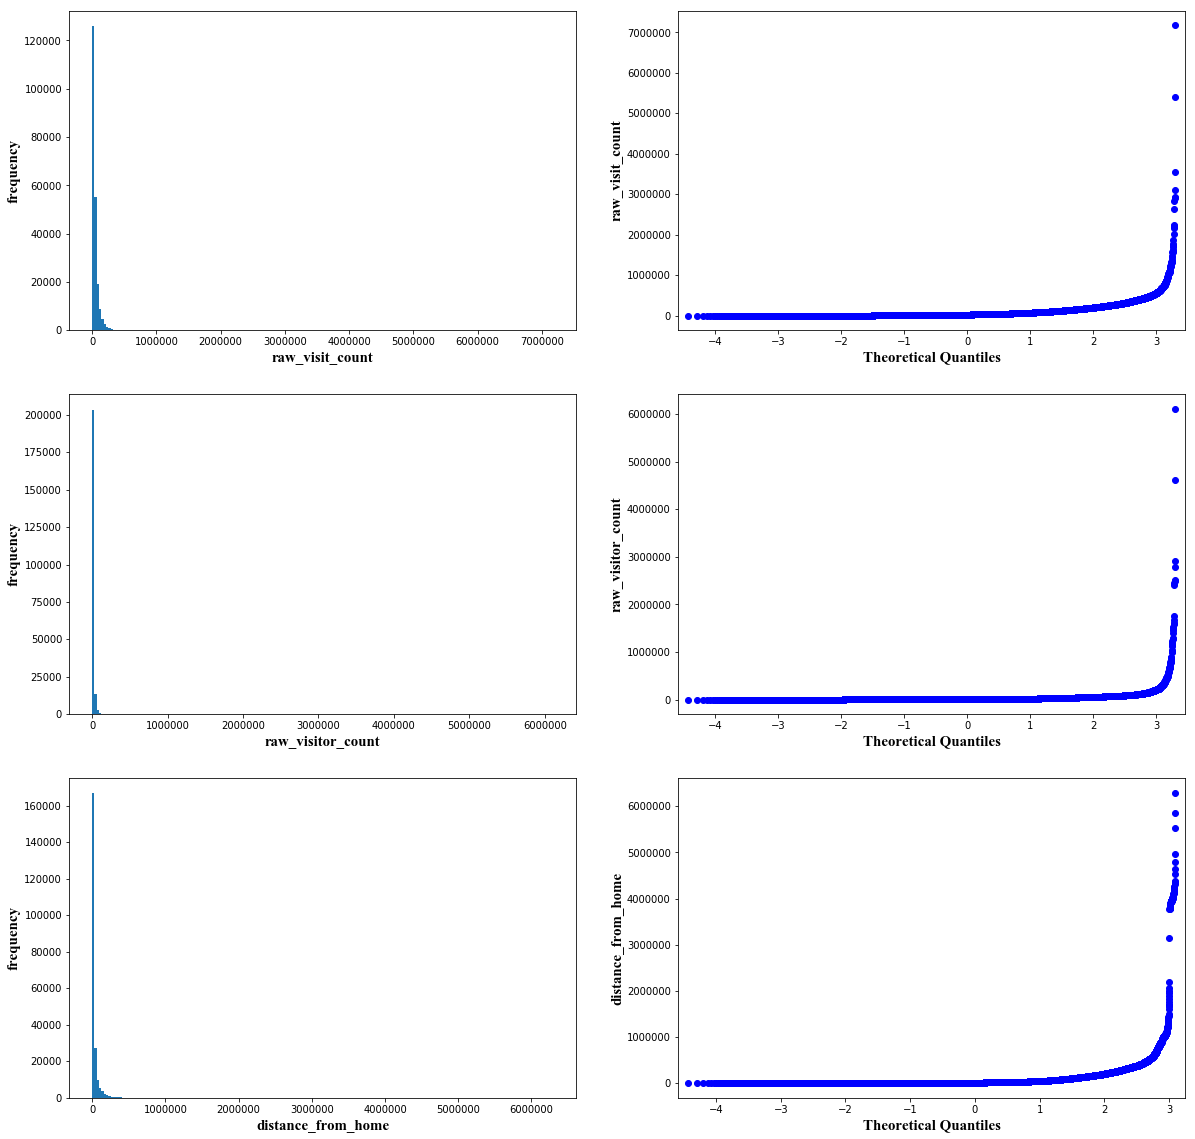

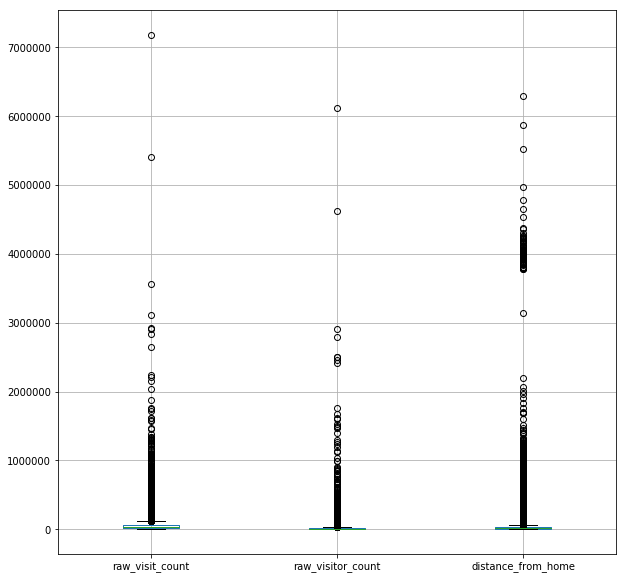

In [10]:
font1 = {'family' : 'Times New Roman',
'weight' : 'normal',
'size'   : 15,
}
fig,axes=plt.subplots(3,2,figsize=(20,20))
# 直方图
axes[0,0].hist(data['raw_visit_count'],bins=200)
axes[0,0].set_xlabel("raw_visit_count",fontdict = font1)
axes[0,0].set_ylabel("frequency",fontdict = font1)
axes[1,0].hist(data['raw_visitor_count'],bins=200)
axes[1,0].set_xlabel("raw_visitor_count",fontdict = font1)
axes[1,0].set_ylabel("frequency",fontdict = font1)
axes[2,0].hist(data['distance_from_home'],bins=200)
axes[2,0].set_xlabel("distance_from_home",fontdict = font1)
axes[2,0].set_ylabel("frequency",fontdict = font1)

# qq图
sm.qqplot(data['raw_visit_count'], line='s', ax=axes[0,1])
axes[0,1].set_xlabel("Theoretical Quantiles",fontdict = font1)
axes[0,1].set_ylabel("raw_visit_count",fontdict = font1)
sm.qqplot(data['raw_visitor_count'], line='s', ax=axes[1,1])
axes[1,1].set_xlabel("Theoretical Quantiles",fontdict = font1)
axes[1,1].set_ylabel("raw_visitor_count",fontdict = font1)
sm.qqplot(data['distance_from_home'], line='s', ax=axes[2,1])
axes[2,1].set_xlabel("Theoretical Quantiles",fontdict = font1)
axes[2,1].set_ylabel("distance_from_home",fontdict = font1)

# 盒图
fig1,axes1 = plt.subplots(1,1,figsize=(10,10))
df = data[['raw_visit_count','raw_visitor_count','distance_from_home']]
df.boxplot()

## 2. 数据缺失值的处理

### 2.1 将缺失部分剔除

对raw_visitor_count、raw_visit_count、distance_from_home三个属性进行缺失值处理。 

In [11]:
data_1 = data.dropna()

使用六边形容器图来可视化地对比新旧数据集。六边形图的横轴、纵轴、颜色深浅各代表一个属性。在途中，横轴表示raw_visitor_count，纵轴表示raw_visit_count，颜色深浅表示distance_from_home。左图是原数据集，越靠近原点的地方表示visitor越少，而这些地方的distance_from_home却很高，说明人们不太愿意去离家很远的地方。在丢弃缺失值之后，纵坐标和横坐标的范围都有减小,说明离群点被删除了。

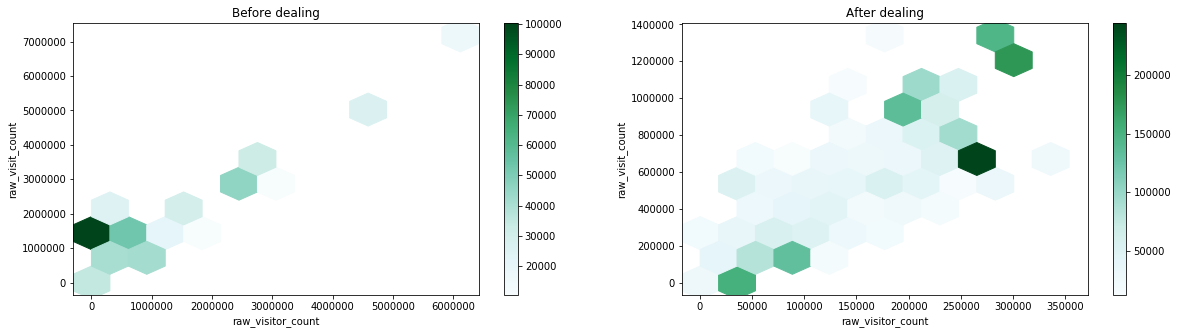

In [12]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
axes.shape
data.plot(kind='hexbin',x="raw_visitor_count",y="raw_visit_count",C="distance_from_home",gridsize=10,ax = axes[0],title='Before dealing')
data_1.plot(kind='hexbin',x='raw_visitor_count',y='raw_visit_count',C='distance_from_home',gridsize=10,ax = axes[1],title='After dealing')
plt.show()

### 2.2 用最高频率值填补缺失值

In [13]:
data_2 = data.copy()
data_2['raw_visit_count'].fillna(list(data['raw_visit_count'].value_counts().index)[0],inplace = True)

data_2['raw_visitor_count'].fillna(list(data['raw_visitor_count'].value_counts().index)[0],inplace=True)

data_2['distance_from_home'].fillna(list(data['distance_from_home'].value_counts().index)[0],inplace=True)
data_2

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{'010059501003': 127, '010059509001': 111, '01...","{'010059501003': 109, '010810407002': 62, '010...",194724.0,"[Chick-fil-A, mcdonalds, Marathon Petroleum, w...","[walmart, mcdonalds, Dollar General, Chick-fil...","[CrossFit, Health Mart, Coldwell Banker]","[2617, 2457, 2403, 2519, 2646, 3007, 3886, 756...","{'Monday': 12000, 'Tuesday': 12224, 'Wednesday..."
1,1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{'010730113021': 210, '010090506022': 205, '01...","{'010890111001': 271, '010730045001': 269, '01...",120587.0,"[Shell Oil, mcdonalds, Chick-fil-A, Chevron]","[walmart, mcdonalds, Shell Oil, Chick-fil-A, D...",NaN,"[6556, 6325, 6222, 6355, 6586, 7350, 8568, 809...","{'Monday': 12125, 'Tuesday': 12984, 'Wednesday..."
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{'010479567011': 67, '010479567021': 60}",{'010479567021': 52},67774.0,[Dollar General],"[walmart, Dollar General, mcdonalds, Chevron, ...",[Dollar General],"[807, 790, 796, 786, 851, 951, 1134, 1797, 135...","{'Monday': 2314, 'Tuesday': 2340, 'Wednesday':..."
3,1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{'010690402013': 370, '010690402011': 322, '01...","{'010690402024': 313, '010690415004': 203, '01...",42684.0,"[Chick-fil-A, Sam's Club, Dollar General, walm...","[walmart, Dollar General, mcdonalds, Marathon ...","[Chick-fil-A, Sam's Club, Olive Garden, mcdona...","[2121, 1828, 1784, 1704, 1861, 2373, 3730, 749...","{'Monday': 21141, 'Tuesday': 21143, 'Wednesday..."
4,1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{'010090507001': 183, '010730113021': 167, '01...","{'010730045001': 140, '010730027001': 123, '01...",18878.0,"[Chevron, Daylight Donuts, walmart]","[walmart, Chevron, Dollar General, Shell Oil, ...","[Chevron, CrossFit]","[3804, 3716, 3686, 3672, 3735, 4115, 4855, 594...","{'Monday': 8402, 'Tuesday': 8414, 'Wednesday':..."
5,1.097006e+10,1538352000,1541030400,152557.0,23556.0,"{'010970063011': 370, '010970063021': 351, '01...","{'010970063011': 328, '010970064023': 125, '01...",40327.0,[walmart],"[walmart, Shell Oil, Dollar General, mcdonalds...","[walmart, Winn Dixie, Ollie's Bargain Outlet, ...","[7153, 6710, 6479, 6556, 7460, 8527, 12533, 12...","{'Monday': 23968, 'Tuesday': 23788, 'Wednesday..."
6,1.103006e+10,1538352000,1541030400,66576.0,9252.0,"{'010890028021': 152, '011030057011': 152, '01...","{'010890111001': 254, '010950305005': 108, '01...",29100.0,"[walmart, Chick-fil-A]","[walmart, Dollar General, mcdonalds, Chick-fil...","[United States Postal Service (USPS), SUBWAY, ...","[2261, 2191, 2140, 2130, 2202, 2818, 4315, 558...","{'Monday': 10269, 'Tuesday': 10568, 'Wednesday..."
7,1.115040e+10,1538352000,1541030400,23534.0,2140.0,"{'011150403001': 114, '011150403003': 110}",NaN,27052.0,"[The American Legion, Dollar General, Jack's F...","[Jack's Family Restaurants, walmart, Dollar Ge...","[Dollar General, United States Postal Service ...","[2459, 2397, 2363, 2385, 2466, 2442, 2509, 329...","{'Monday': 3578, 'Tuesday': 3520, 'Wednesday':..."
8,2.020001e+10,1538352000,1541030400,20349.0,6101.0,"{'020200027114': 94, '020200028232': 83, '0202...","{'020200016021': 103, '020200011001': 92, '020...",8092.0,"[Papa Murphy's, starbucks, Holiday Station]","[starbucks, walmart, mcdonalds, Holiday Statio...","[Papa Murphy's, Burger King US, Chevron, Play ...","[673, 554, 484, 439, 450, 476, 583, 1313, 942,...","{'Monday': 3153, 'Tuesday': 3351, 'Wednesday':..."
9,4.001944e+10,1538352000,1541030400,5102.0,1558.0,NaN,NaN,342203.0,"[Burger King US, ConocoPhillips, SUBWAY, Chevr...","[walmart, Chevron, Shell Oil, Denny's, mcdonal...",[ConocoPhillips],"[755, 729, 701, 661, 640, 686, 660, 716, 716, ...","{'Monday': 742, 'Tuesday': 748, 'Wednesday':

仍然使用六边形容器图来对比新旧数据集，可见原数据集和新数据集差别不大。

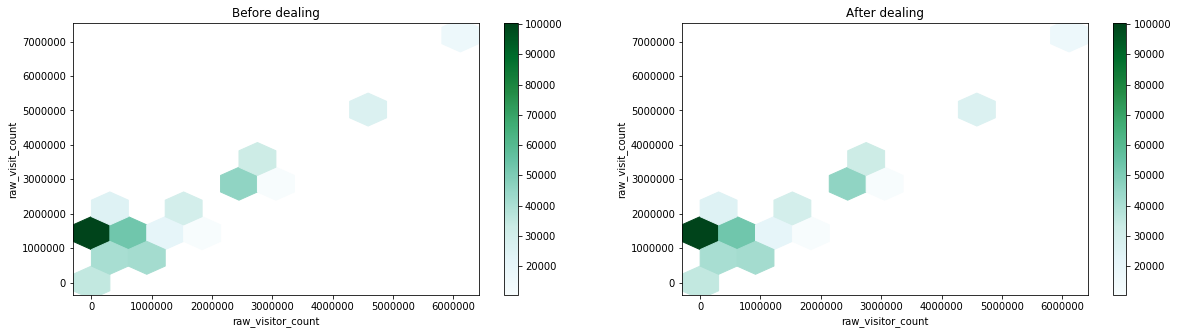

In [14]:
fig,axes = plt.subplots(1,2,figsize=(20,5))
axes.shape
data.plot(kind='hexbin',x="raw_visitor_count",y="raw_visit_count",C="distance_from_home",gridsize=10,ax = axes[0],title='Before dealing')
data_2.plot(kind='hexbin',x='raw_visitor_count',y='raw_visit_count',C='distance_from_home',gridsize=10,ax = axes[1],title='After dealing')
plt.show()